In [1]:
pip install dtw
pip install librosa

/mnt/lustre/share/spring/conda_envs/miniconda3/envs/s0.3.4/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
/mnt/lustre/share/spring/conda_envs/miniconda3/envs/s0.3.4/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05  0.0000000e+00 ...  3.0517578e-05
  6.1035156e-05  9.1552734e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


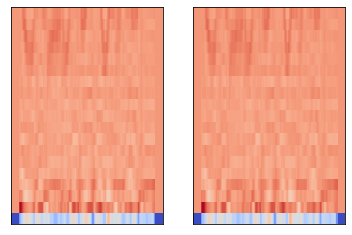

The normalized distance between the two :  4862.13290643692


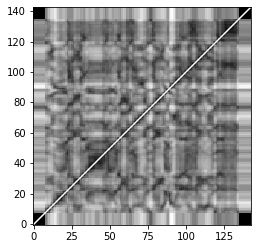

In [15]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from dtw import dtw
import os
import pathlib
from numpy.linalg import norm

#Loading audio files 
#Change your path here
audio_index = 1
y1, sr1 = librosa.load(f'./data_wav/{str(audio_index)}_fp.wav')    
y2, sr2 = librosa.load(f'./data_wav/{str(audio_index)}_quant.wav')   

#Showing multiple plots using subplot
plt.subplot(1, 2, 1) 
mfcc1 = librosa.feature.mfcc(y1,sr1)   #Computing MFCC values
librosa.display.specshow(mfcc1)

plt.subplot(1, 2, 2)
mfcc2 = librosa.feature.mfcc(y2, sr2)
librosa.display.specshow(mfcc2)
plt.show()

dist, cost, acc_cost, path = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
print("The normalized distance between the two : ",dist)   # 0 for similar audios 

plt.imshow(cost.T, origin='lower', cmap=plt.get_cmap('gray'), interpolation='nearest')
plt.plot(path[0], path[1], 'w')   #creating plot for DTW
plt.xlim((-0.5, cost.shape[0]-0.5))
plt.ylim((-0.5, cost.shape[1]-0.5))

plt.show()
